In [43]:
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url='https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df=pd.read_csv(url)

troca={
    0:1,
    1:0
}

df['finished']=df.unfinished.map(troca)
x=df[['expected_hours','price']]
y=df['finished']

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

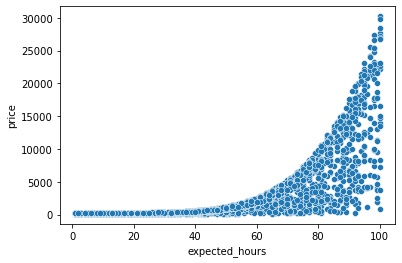

In [6]:
sns.scatterplot(x='expected_hours',y='price', data=df)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

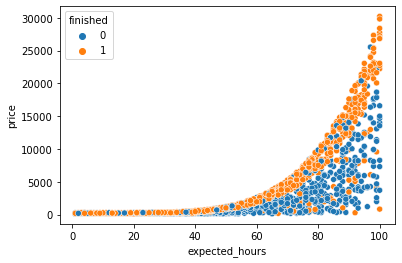

In [7]:
sns.scatterplot(x='expected_hours',y='price',hue='finished', data=df)

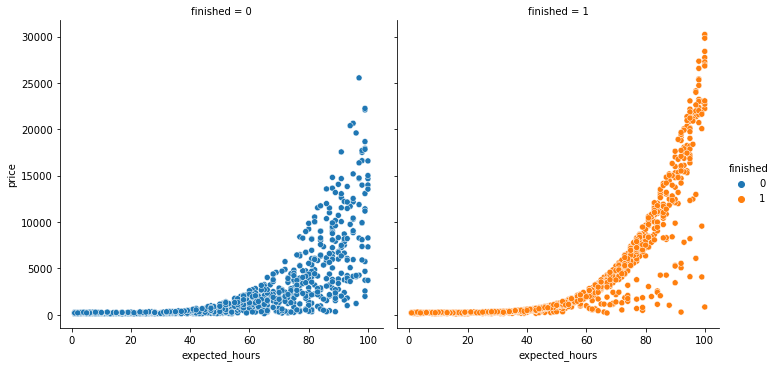

In [8]:
sns.relplot(x='expected_hours',y='price',hue='finished',col='finished', data=df)

In [49]:
SEED=42
np.random.seed(SEED)
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=SEED,stratify=y,test_size=0.25)
model=LinearSVC()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print((accuracy_score(test_y,prediction))*100)

47.40740740740741


In [19]:
base_line=np.ones(len(test_y))
print((accuracy_score(test_y,base_line))*100)

52.59259259259259


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

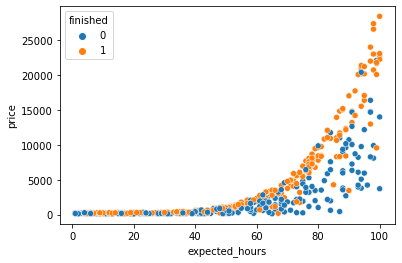

In [21]:
sns.scatterplot(x='expected_hours',y='price',hue=test_y, data=test_x)

In [26]:
x_min=test_x.expected_hours.min()
x_max=test_x.expected_hours.max()
y_min=test_x.price.min()
y_max=test_x.price.max()
print(x_min,x_max,y_min,y_max)

1 100 100 28398


In [30]:
n_poits=100
x_fig=np.linspace(x_min,x_max,n_poits)
y_fig=np.linspace(y_min,y_max,n_poits)
xx,yy=np.meshgrid(x_fig,y_fig)
dots=np.c_[xx.ravel(),yy.ravel()]

In [42]:
Z=model.predict(dots)
Z=Z.reshape(xx.shape)

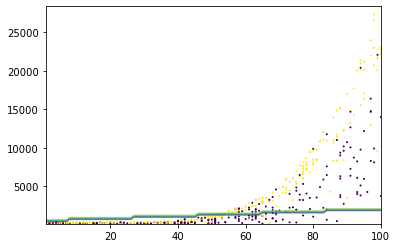

In [48]:
plt.scatter(test_x.expected_hours,test_x.price,c=test_y,s=1)
plt.contour(xx,yy,Z,alpha=0.4)

#Decision boundary